In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_context('talk')
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
from datetime import timedelta
import datetime as dt
import scipy
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter


from get_data.get_data import get_ecdc_data

## Get ECDC data for all countries

In [2]:
ecdc=get_ecdc_data(continent=False)
ecdc=ecdc.groupby(by='date',as_index=False).sum()


worldwidedeathsperyear=60.20e6 #in 2020
avgdeathsperday=worldwidedeathsperyear/366
ecdc['avgdeathsperday']=avgdeathsperday

## Plot

/Users/ivandebono/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


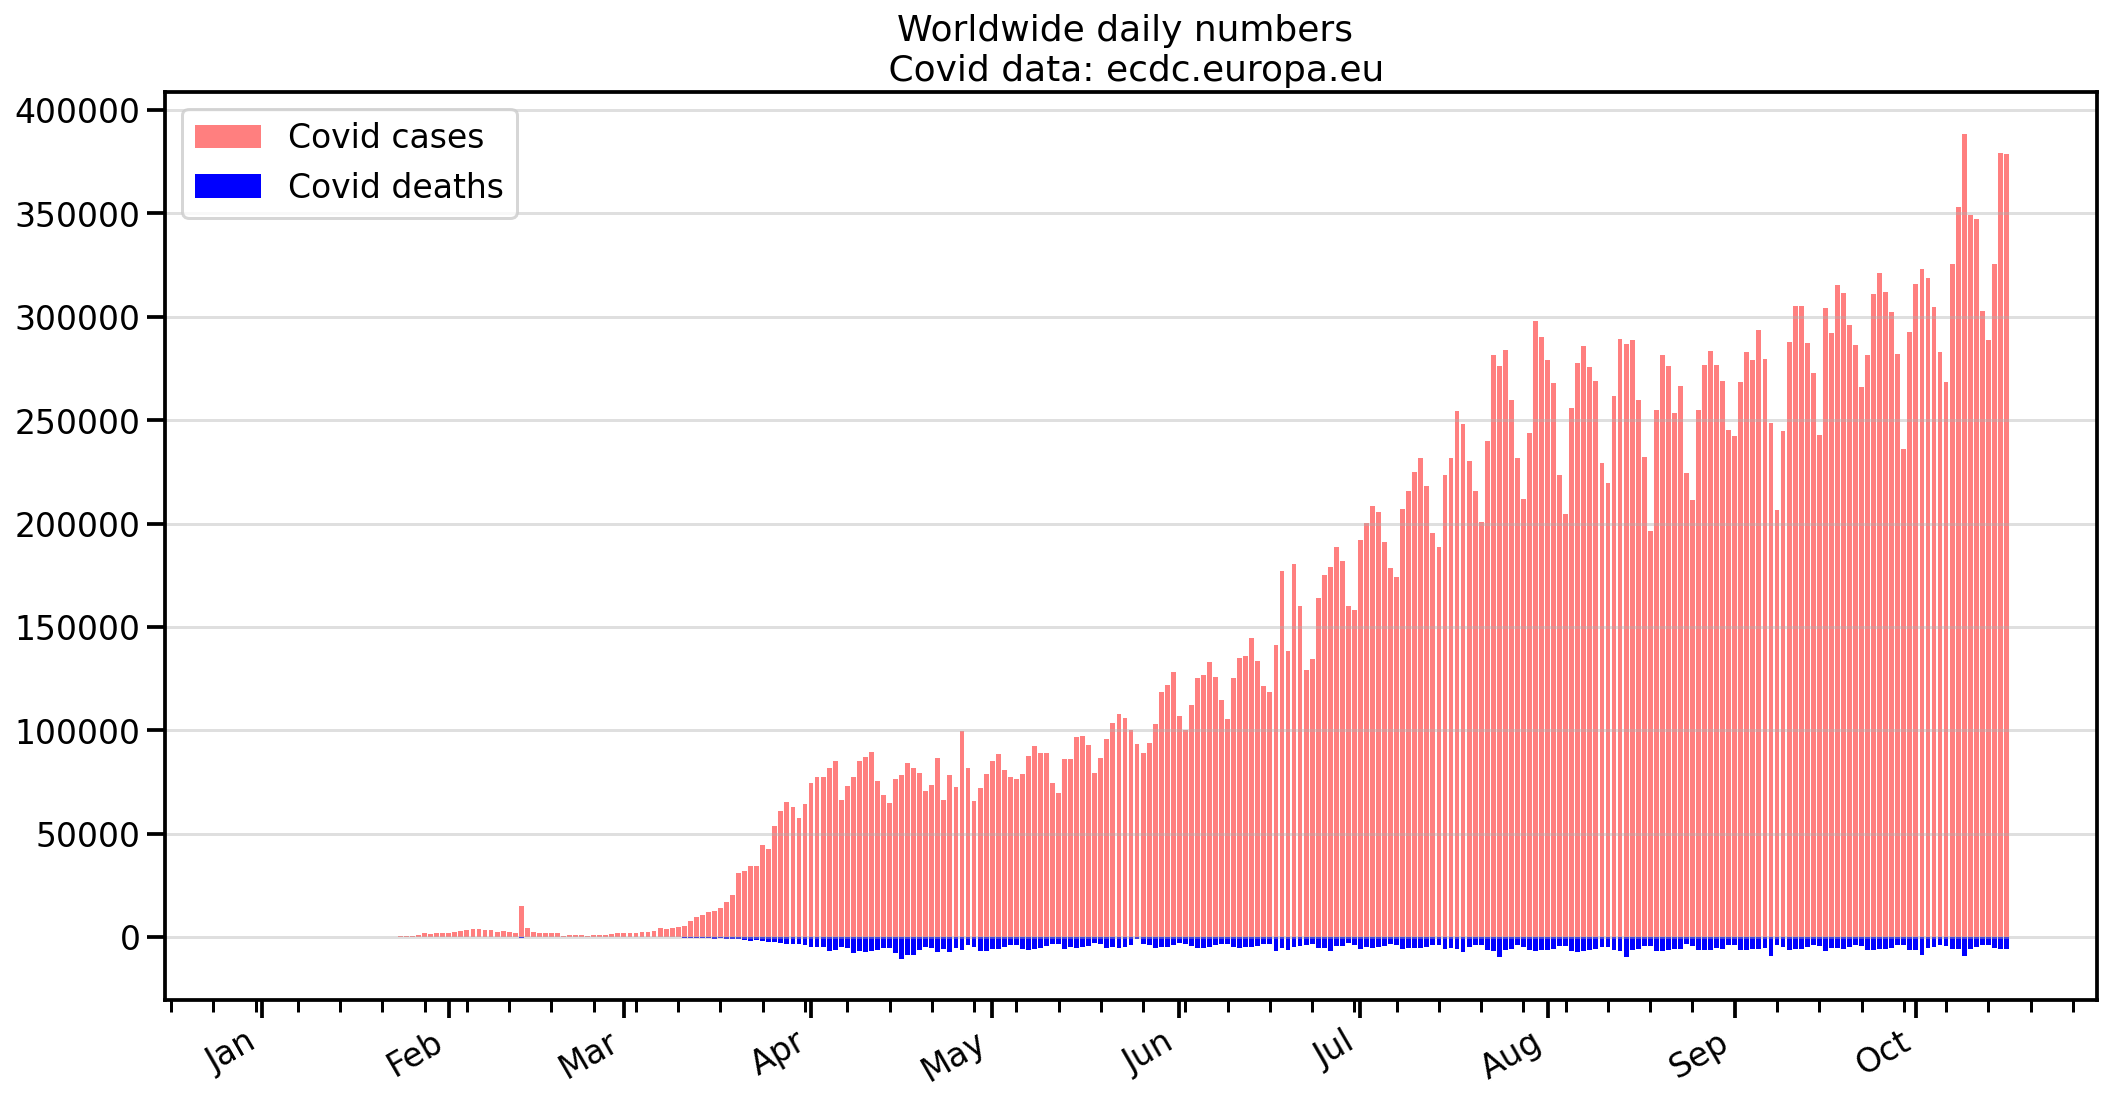

In [3]:
# Choose whether to add some noise
#noise = np.random.normal(0, 5000, ecdc['avgdeathsperday'].shape)
#ecdc['avgdeathsperday']=ecdc['avgdeathsperday']+noise


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(15, 8))

plt.title('Worldwide daily numbers \n Covid data: ecdc.europa.eu')          
    

ax.bar(ecdc.date, ecdc.positive,label='Covid cases',color='red',alpha=0.5)
ax.bar(ecdc.date, -1*ecdc.deaths,label='Covid deaths',color='blue',alpha=1)
#ax.bar(ecdc.date, -1*ecdc.avgdeathsperday,label='Average daily deaths from all causes',color='purple',alpha=0.5)


# Format x labels
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

# Use absolute value for y-ticks
ticks =  ax.get_yticks()
ax.set_yticklabels([int(abs(tick)) for tick in ticks])

plt.legend(facecolor='white')


plt.grid(axis='y',alpha=0.4)


fig.set_facecolor('w')

fig.autofmt_xdate()
sns.despine;
plt.tight_layout()

plt.savefig('plots/Global_Covid.png',dpi=250)

/Users/ivandebono/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator


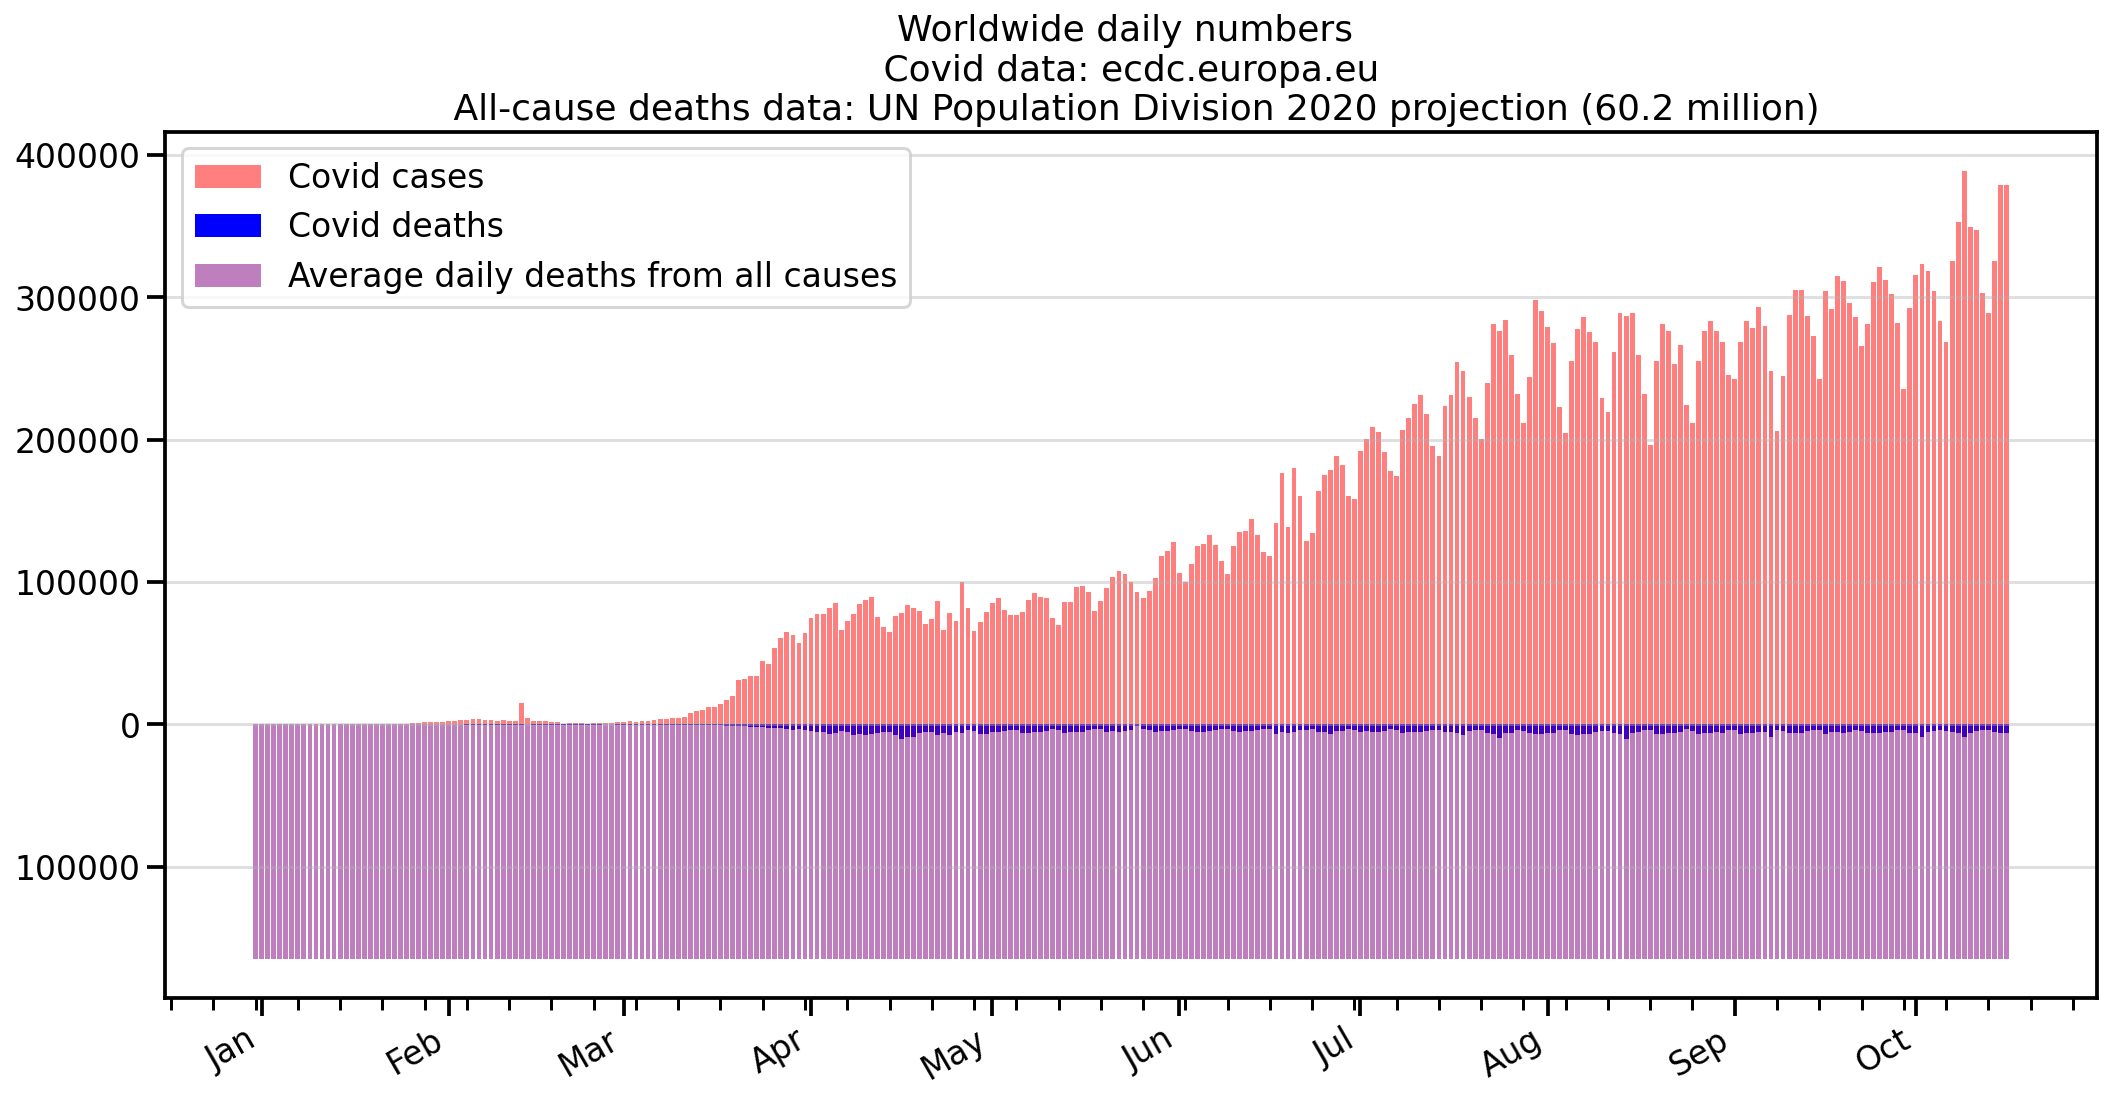

In [4]:
# Choose whether to add some noise
#noise = np.random.normal(0, 5000, ecdc['avgdeathsperday'].shape)
#ecdc['avgdeathsperday']=ecdc['avgdeathsperday']+noise


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(15, 8))

plt.title('Worldwide daily numbers \n Covid data: ecdc.europa.eu \n All-cause deaths data: UN Population Division 2020 projection (60.2 million)')          
    
ecdc['reversedeaths']=-1*ecdc.deaths
ax.bar(ecdc.date, ecdc.positive,label='Covid cases',color='red',alpha=0.5)
ax.bar(ecdc.date, -1*ecdc.deaths,label='Covid deaths',color='blue',alpha=1)
ax.bar(ecdc.date, -1*ecdc.avgdeathsperday,label='Average daily deaths from all causes',color='purple',alpha=0.5)


# Format x labels
plt.xticks(rotation=90)
plt.tight_layout()
# Use absolute value for y-ticks
#ticks =  ax.get_yticks()
#ax.set_yticklabels([int(abs(tick)) for tick in ticks])

ax.xaxis.set_major_locator(months)
#ax.format_xdata = mdates.DateFormatter('%b %Y')
monthsFmt = DateFormatter("%b")
ax.xaxis.set_major_formatter(monthsFmt)

ax.xaxis.set_minor_locator(WeekdayLocator())

ticks =  ax.get_yticks()
ax.set_yticklabels([int(abs(tick)) for tick in ticks])
#plt.ylim=[-100000,300000]
plt.legend(facecolor='white')


plt.grid(axis='y',alpha=0.4)


fig.set_facecolor('w')

fig.autofmt_xdate()
sns.despine;
plt.tight_layout()

plt.savefig('plots/Global_Covid_v_Normal.png',dpi=250)

In [5]:
#https://gateway.euro.who.int/en/indicators/hfamdb_98-deaths-all-causes/visualizations/#id=29302
#url='https://dw.euro.who.int/api/v3/export/HFAMDB_98?filter=SUBNATIONAL_MDB:$blank&amp;lang=EN&amp;format=xlsx'

In [6]:
#See also https://www.who.int/healthinfo/global_burden_disease/metrics_daly/en/